In [1]:
import pandas as pd

csv_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv'
csv_logP_test_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\test.csv'

df = pd.read_csv(csv_path, index_col=0)
df_test_splited_by_tanimoto = pd.read_csv(csv_logP_test_path, index_col=0)

logP_smiles = df_test_splited_by_tanimoto['Smiles'].tolist()
pKa_smiles, pKa_values = [], []

for index, row in df.iterrows():
    if row['Amides for LogP'] in logP_smiles:
        pKa_smiles.append(row['Smiles'])
        pKa_values.append(row['pKa'])

df_pKa_test = pd.DataFrame({"smiles": pKa_smiles,
                            "pKa": pKa_values})

In [2]:
logP_smiles = df_test_splited_by_tanimoto['Smiles'].tolist()
pKa_smiles, pKa_values = [], []

for index, row in df.iterrows():
    if row['Amides for LogP'] in logP_smiles:
        pKa_smiles.append(row['Smiles'])
        pKa_values.append(row['pKa'])

df_pKa_test = pd.DataFrame({"smiles": pKa_smiles,
                            "pKa": pKa_values})

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def calculate_metrics(true_values, pred_values):
    mse = round(mean_squared_error(true_values, pred_values),3)
    mae = round(mean_absolute_error(true_values, pred_values),3)
    r_score = round(r2_score(true_values, pred_values),3)

    return {"mse": mse,
            "mae": mae,
            "r^2": r_score,}

In [5]:
import pandas as pd

pKa_test_csv = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\csv_for_rulefit\test_pKa_v4_features_2.2.csv'
pKa_train_csv = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\csv_for_rulefit\train_pKa_v4_features_2.2.csv'

logP_test_csv = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\csv_for_rulefit\test_logP_v4_features_2.2.csv'
logP_train_csv = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\csv_for_rulefit\train_logP_v4_features_2.2.csv'

In [6]:
df_pka_train = pd.read_csv(pKa_train_csv, index_col=0)
df_pka_test = pd.read_csv(pKa_test_csv, index_col=0)

In [7]:
LOGP_FEATURES = ['f_freedom', 'PPSA5', 'mol_num_cycles', 'nFRing', 'nF', 'identificator',
                 'mol_weight', 'dipole_moment', 'nHRing', 'nO', 'PBF', 'nC', 'nARing',
                 'cis/trans', 'PNSA5', 'FPSA3', 'mol_volume', 'RPCS', 'GeomShapeIndex',
                 'WPSA5', 'TASA', 'f_to_fg', 'avg_atoms_in_cycle', 'nFHRing',
                 'chirality']

PKA_FEATURES = ['RPCS', 'PBF', 'mol_weight', 'dipole_moment', 'PPSA5',
                'avg_atoms_in_cycle', 'nHRing', 'cis/trans', 'FPSA3', 'nF', 'chirality',
                'sasa', 'PNSA5', 'GeomShapeIndex', 'TASA', 'mol_num_cycles',
                'f_freedom', 'nFRing', 'identificator', 'nO', 'nARing', 'nC', 'nFHRing',
                'f_to_fg']

In [8]:
y_pka_train = df_pka_train[['pKa']]
y_pka_test = df_pka_test[['pKa']]

X_pka_train = df_pka_train[PKA_FEATURES]
X_pka_test = df_pka_test[PKA_FEATURES]

In [6]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_pka_test)

X_pka_train_norm = min_max_scaler.transform(X_pka_train)
X_pka_test_norm = min_max_scaler.transform(X_pka_test)

y_pka_train_norm = y_pka_train.values
y_pka_test_norm = y_pka_test.values

In [26]:
df_train_norm = pd.DataFrame(X_pka_train_norm, columns=PKA_FEATURES)
df_test_norm = pd.DataFrame(X_pka_test_norm, columns=PKA_FEATURES)

df_train_norm['fold_id'] = df_pka_train.copy()['fold_id'].tolist()

df_train_norm['pKa'] = df_pka_train.copy()['pKa'].tolist()
df_test_norm['pKa'] = df_pka_test.copy()['pKa'].tolist()

In [29]:
import os

save_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKA_logP_minmaxscaler'

df_train_norm.to_csv(os.path.join(save_path, 'train_pka_minmax.csv'))
df_test_norm.to_csv(os.path.join(save_path, 'test_pka_minmax.csv'))

Linear regression

In [8]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_pka_train_norm, y_pka_train_norm)

y_pred = regr.predict(X_pka_test_norm)

In [9]:
calculate_metrics(y_pred, y_pka_test_norm)

{'mse': 0.728, 'mae': 0.698, 'r^2': 0.887}

Standartization

In [12]:
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler().fit(X_pka_test)

X_pka_train_norm = standart_scaler.transform(X_pka_train)
X_pka_test_norm = standart_scaler.transform(X_pka_test)

y_pka_train_norm = y_pka_train.values
y_pka_test_norm = y_pka_test.values

In [15]:
df_train_norm = pd.DataFrame(X_pka_train_norm, columns=PKA_FEATURES)
df_test_norm = pd.DataFrame(X_pka_test_norm, columns=PKA_FEATURES)

df_train_norm['fold_id'] = df_pka_train.copy()['fold_id'].tolist()

df_train_norm['pKa'] = df_pka_train.copy()['pKa'].tolist()
df_test_norm['pKa'] = df_pka_test.copy()['pKa'].tolist()

In [17]:
import os

save_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_logP_minmaxscaler\pKa'

df_train_norm.to_csv(os.path.join(save_path, 'train_pka_standart_scaler.csv'))
df_test_norm.to_csv(os.path.join(save_path, 'test_pka_standart_scaler.csv'))

In [11]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_pka_train, y_pka_train_norm)

y_pred = regr.predict(X_pka_test)

calculate_metrics(y_pred, y_pka_test_norm)

{'mse': 0.728, 'mae': 0.698, 'r^2': 0.887}

Standartization with Y

In [12]:
from sklearn.preprocessing import StandardScaler

X_standart_scaler = StandardScaler().fit(X_pka_test)

X_pka_train_norm = X_standart_scaler.transform(X_pka_train)
X_pka_test_norm = X_standart_scaler.transform(X_pka_test)

y_standart_scaler = StandardScaler().fit(y_pka_test)

y_pka_train_norm = y_standart_scaler.transform(y_pka_train)
y_pka_test_norm = y_standart_scaler.transform(y_pka_test)

In [13]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_pka_train_norm, y_pka_train_norm)

y_pred = regr.predict(X_pka_test_norm)

calculate_metrics(y_pred, y_pka_test_norm)

{'mse': 0.121, 'mae': 0.284, 'r^2': 0.887}

logP

In [18]:
df_logp_train = pd.read_csv(logP_train_csv, index_col=0)
df_logp_test = pd.read_csv(logP_test_csv, index_col=0)

y_logp_train = df_logp_train[['logP']]
y_logp_test = df_logp_test[['logP']]

X_logp_train = df_logp_train[LOGP_FEATURES]
X_logp_test = df_logp_test[LOGP_FEATURES]

In [19]:
from sklearn.preprocessing import StandardScaler

min_max_scaler = StandardScaler().fit(X_logp_test)

X_logp_train_norm = min_max_scaler.transform(X_logp_train)
X_logp_test_norm = min_max_scaler.transform(X_logp_test)

y_logp_train_norm = y_logp_train.values
y_logp_test_norm = y_logp_test.values

In [22]:
df_train_norm = pd.DataFrame(X_logp_train_norm, columns=LOGP_FEATURES)
df_test_norm = pd.DataFrame(X_logp_test_norm, columns=LOGP_FEATURES)

df_train_norm['fold_id'] = df_logp_train.copy()['fold_id'].tolist()

df_train_norm['logP'] = df_logp_train.copy()['logP'].tolist()
df_test_norm['logP'] = df_logp_test.copy()['logP'].tolist()

In [24]:
import os

save_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKA_logP_minmaxscaler\logP'

df_train_norm.to_csv(os.path.join(save_path, 'train_logp_standart_scaler.csv'))
df_test_norm.to_csv(os.path.join(save_path, 'test_logp_standart_scaler.csv'))

In [39]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_logp_test)

X_logp_train_norm = min_max_scaler.transform(X_logp_train)
X_logp_test_norm = min_max_scaler.transform(X_logp_test)

y_logp_train_norm = y_logp_train.values
y_logp_test_norm = y_logp_test.values

In [43]:
df_train_norm = pd.DataFrame(X_logp_train_norm, columns=LOGP_FEATURES)
df_test_norm = pd.DataFrame(X_logp_test_norm, columns=LOGP_FEATURES)

df_train_norm['fold_id'] = df_logp_train.copy()['fold_id'].tolist()

df_train_norm['logP'] = df_logp_train.copy()['logP'].tolist()
df_test_norm['logP'] = df_logp_test.copy()['logP'].tolist()

In [42]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_logp_train_norm, y_logp_train_norm)

y_pred = regr.predict(X_logp_test_norm)

calculate_metrics(y_pred, y_logp_test_norm)

{'mse': 0.025, 'mae': 0.119, 'r^2': 0.908}

In [47]:
import os

save_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKA_logP_minmaxscaler\logP'

df_train_norm.to_csv(os.path.join(save_path, 'train_pka_minmax.csv'))
df_test_norm.to_csv(os.path.join(save_path, 'test_pka_minmax.csv'))

standartization with Y

In [21]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(X_logp_test)

X_logp_train_norm = x_scaler.transform(X_logp_train)
X_logp_test_norm = x_scaler.transform(X_logp_test)

y_scaler = StandardScaler().fit(y_logp_test)

y_logp_train_norm = y_scaler.transform(y_logp_train)
y_logp_test_norm = y_scaler.transform(y_logp_test)

In [22]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_logp_train_norm, y_logp_train_norm)

y_pred = regr.predict(X_logp_test_norm)

calculate_metrics(y_pred, y_logp_test_norm)

{'mse': 0.119, 'mae': 0.263, 'r^2': 0.865}

<Axes: >

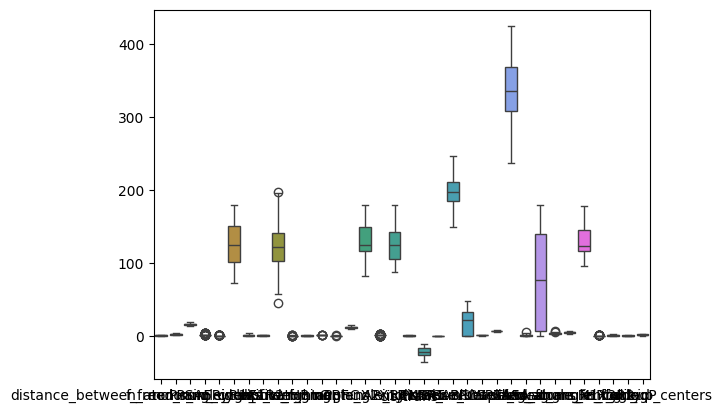

In [27]:
import seaborn as sns

sns.boxplot(data=df)